<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_33_Spring_2021_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 Lecture 33 - Spring 2021

## Another design example for CNN's with the MNIST data (hint: the accuracy improves)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


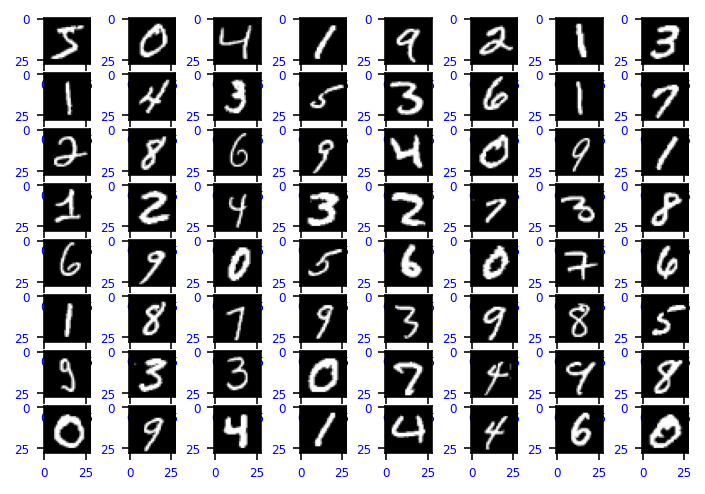

In [ ]:
from keras.utils import to_categorical
# example of loading the mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(64):
	# define subplot
 plt.subplot(8,8,i+1)
	# plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 plt.xticks(color='b',fontsize=6)
 plt.yticks(color='b',fontsize=6)
# show the figure
plt.show()

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

# what we need to design the CNN
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.optimizers import SGD, Adam
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# This is the Design of the Convulutional Neural Network model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1)))
  model.add(LeakyReLU(alpha=0.15))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(3, 3)))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1234)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=25, batch_size=250, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 


> 99.125
> 99.033
> 99.158
> 99.342
> 99.025


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


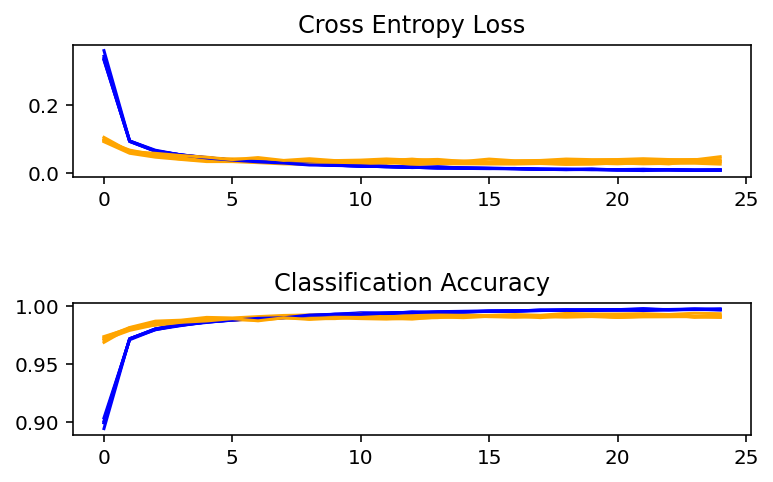

Accuracy: mean=99.137 std=0.115, n=5


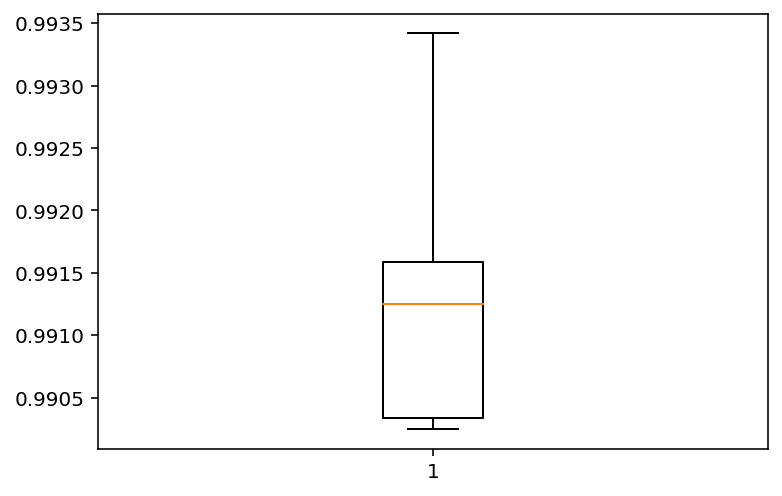

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		plt.tight_layout(pad=3.0)
	plt.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

### Interesting read: AlexNet - Cifar10
https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

<font face="Calibri" color="darkgreen" size=8> Dimensionality Reduction</font>

<font color='crimson'>**Why we care about dimensionality:**</font> Big data is characterized not just by a large number of observations, but also by very large number of input features. Very often the problem is that not all features in the data are important for solving the regression or the classification problems. At the same time, it is difficult to computationally accomodate too many input features into the model.

<font color='deepskyblue'>**Possible Solutions (Regression Problems):**</font> Algorithms for feature selection and feature extraction.



<font color='green'> Feature Selection: What data should you put into your model? For linear regression models the variable selection approaches include backward elimination, forward selection, bidirectional elimination and penalized regression techniques such as LASSO or Elastic Net.

<font color='navy'>  General Heuristics: Reducing the number of variables can greatly aid interpretability, reduce the chances your violating key assumptions, and let you go beyond simple prediction. Furthermore, smaller models (parsimonious models) are easier to update and interpret - every column of data you add is a column of data you have to collect in the future if you ever want to use your model again. Less is better - don’t invest resources to collect data you don’t need!</font>

**Backward Elimination:**

Select a significance for model inclusion (i.e., 0.05)

Fit full model with everything

Remove the predictor with the highest P-value (if it is greater than your threshold in step 1).

Continue this process until all models have a significance less than your threshold.

**Forward Selection:**

Select a significance level (i.e., 0.05).

Fit all regressions possible with only one variable. Select the model with the lowest P value.

Repeat this, adding the variable from step ii.

Keep going until no p values are less than your threshold in step i.

**Bidirectional Elimination:**

Choose a p-value for staying and entering into the model (i.e., 0.05).

Do forward selection to pick the best variables.

Do backward elimination and remove variables.

Repeat until no variables are added or removed in either step.

The problem with the stepwise approaches is that they are very sensitive to model assumptions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
# Implementation of stepwise regression
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details """
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
# here we apply stepwise regression
result = stepwise_selection(X,y)

##<font color='forestgreen'> Regression Problems </font>

<font color='blue'>**Variable Selection:**</font> most of the methods are based on *penalized regression techniques*. 

<font color='blue'>**Feature Extraction:**</font> Heuristically, feature extraction focuses on how to scale, rotate, or otherwise redefine (feature engineering) your data to create a smaller number of variables that summarize all of your other variables in the way most helpful to predict your outcome.

<font color='salmon'>**Main Idea:**</font> we can summarize the contribution of a subset of features based on finding the direction of the biggest variablity or variance. Such directions, that summarize most of the variablility in the data, are called principal components.

The following is an example in two dimensions:
<figure>
<center>
<img src='https://drive.google.com/uc?id=1Pu07tYhEWeA7hY9Sg3pZ8XAD62-ctQ_6' 
width='400px' />
<figcaption>Example of PCA in 2D</figcaption></center>
</figure>

The direction along the vector $\vec{PC}_1$ is the first principal component; along this direction we have the highest variance. The second principal component, $\vec{PC}_2$, is perpendicular to the first one.

<font color='crimson'>**Important:**</font> For regression problems we want to first rank the principal components and select only the first few that summarize in total more than 99% of the variance in the data set. Such ranking is possible by using a linear algebra concept (such as eigenvalues). The whole process is called Principal Component Analysis, abbreviated PCA.



(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

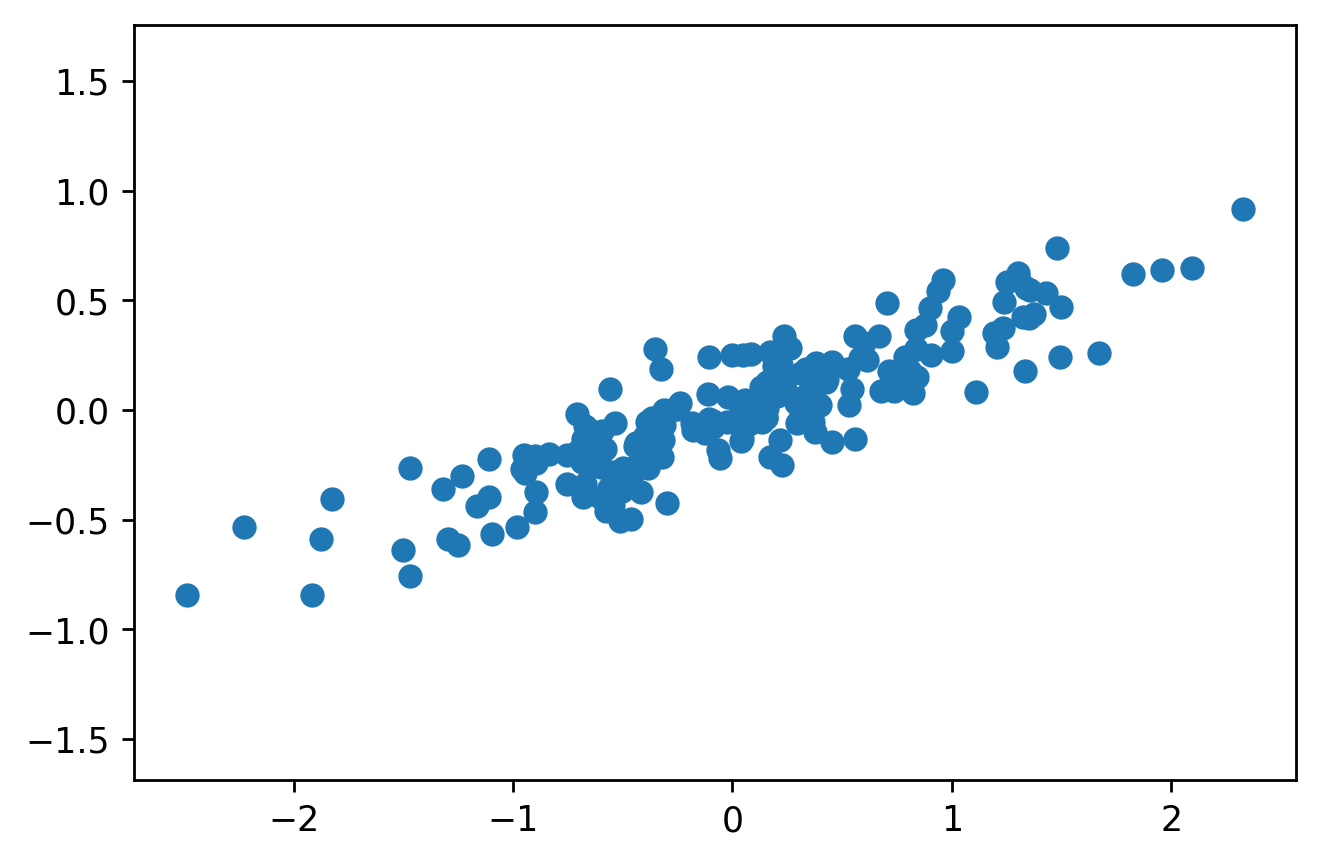

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Base of the scatter plot we see the direction of maximum variance.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


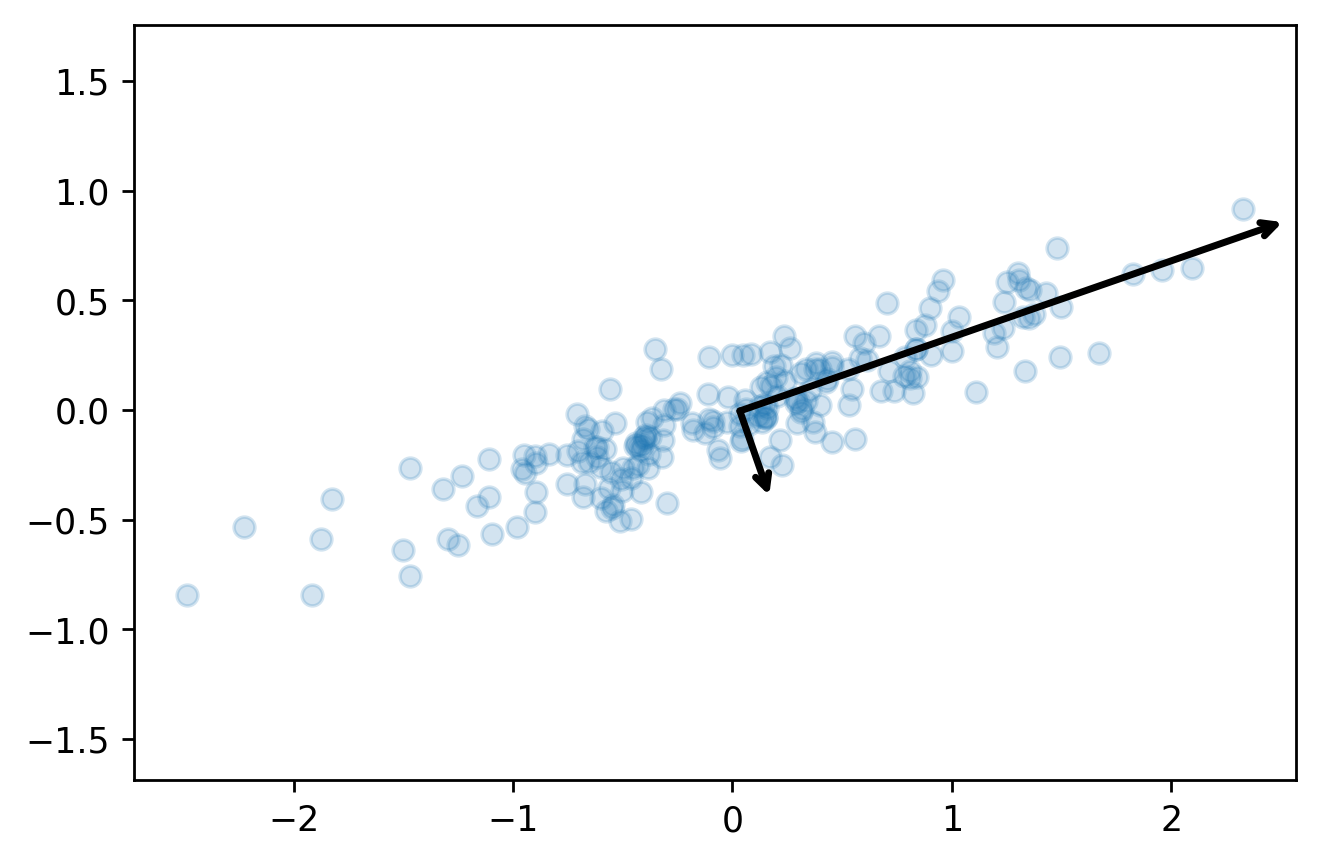

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = -vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

##<font color='forestgreen'> Classification Problems</font>

In classification problems we are interested to find, for example, the direction under which, if we project the features, we get the best accuracy for separating the classes

<figure>
<center>
<img src='https://drive.google.com/uc?id=1JvHzrEKwsMhKV4ma4ZlCkBlCGbq0lc4U' 
width='450px' />
<figcaption>Example of LDA in 2D</figcaption></center>
</figure>
